<a href="https://colab.research.google.com/github/geopayme/hubot/blob/master/DLSFH_EntropyMap_Enhanced_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌞 DLSFH Solar Entropy Analysis (Enhanced)
This version includes:
- Full entropy vector extraction
- Inner vs outer ring breakdown
- Pattern-based asymmetry detection
- Dynamic interpretation logic based on vector shape, not just counts


In [8]:
# 📤 Upload solar magnetogram
try:
    from google.colab import files
    uploaded = files.upload()
    image_path = next(iter(uploaded))
except:
    image_path = 'sun_2025_03_28.jpg'
print(f'Image in use: {image_path}')

Saving bbzqa250328t0004_dim-860.jpg to bbzqa250328t0004_dim-860.jpg
Image in use: bbzqa250328t0004_dim-860.jpg


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

base_name = os.path.splitext(os.path.basename(image_path))[0]
entropy_map_npy = f'{base_name}_entropy_map.npy'
entropy_map_png = f'{base_name}_entropy_map.png'
entropy_vector_npy = f'{base_name}_entropy_vector.npy'

In [10]:
# 🔍 Create entropy map
img = Image.open(image_path).convert('L')
img_array = np.array(img)
h, w = img_array.shape
cx, cy = w // 2, h // 2
radius = min(cx, cy) - 10
y_indices, x_indices = np.ogrid[:h, :w]
mask = (x_indices - cx)**2 + (y_indices - cy)**2 <= radius**2
disk_values = img_array[mask]
scaled_field = (disk_values / 255.0) * 200 - 100
hist, bin_edges = np.histogram(scaled_field, bins=50, density=True)
entropy_map = np.zeros_like(img_array, dtype=float)
entropy_map[mask] = np.interp(disk_values, bin_edges[:-1], hist)
np.save(entropy_map_npy, entropy_map)
plt.imsave(entropy_map_png, entropy_map, cmap='inferno')

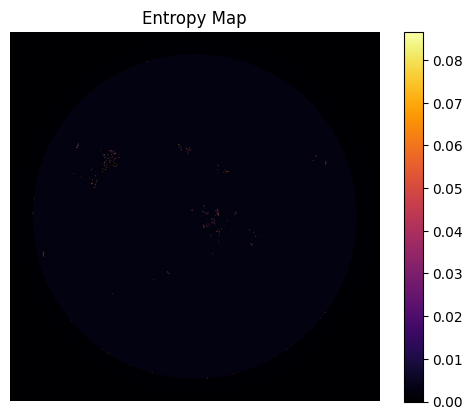

In [11]:
# 🔬 Show entropy map
plt.imshow(entropy_map, cmap='inferno')
plt.title('Entropy Map')
plt.axis('off')
plt.colorbar()
plt.show()

In [12]:
# 📐 DLSFH 20-node vector
angles = np.linspace(0, 2 * np.pi, 21)
radii = [0.3, 0.65]
zones = [(int(cx + r * radius * np.cos((angles[i]+angles[i+1])/2)),
          int(cy + r * radius * np.sin((angles[i]+angles[i+1])/2)))
         for r in radii for i in range(10)]
kernel = 20
entropy_20 = np.array([
    np.mean(entropy_map[max(0, y-kernel):min(h, y+kernel), max(0, x-kernel):min(w, x+kernel)])
    for x, y in zones
])
np.save(entropy_vector_npy, entropy_20)

In [13]:
# 🧠 Enhanced dynamic interpretation
sigma_c = 0.07
inner_ring = entropy_20[:10]
outer_ring = entropy_20[10:]
collapsed_inner = inner_ring >= sigma_c
collapsed_outer = outer_ring >= sigma_c
total_inner = np.sum(collapsed_inner)
total_outer = np.sum(collapsed_outer)

# Look for arcs (3 or more adjacent)
arc_inner = any(np.sum(inner_ring[i:i+3] >= sigma_c) >= 3 for i in range(8))
arc_outer = any(np.sum(outer_ring[i:i+3] >= sigma_c) >= 3 for i in range(8))

print("=== Dynamic Solar Entropy Interpretation ===")
print(f"Entropy Vector: {np.round(entropy_20, 4)}")
print(f"Collapsed Nodes (Inner Ring): {total_inner}/10")
print(f"Collapsed Nodes (Outer Ring): {total_outer}/10")

if total_inner == 0 and total_outer == 0:
    print("→ Entire system coherent. Baseline or minimum state.")
elif arc_outer and total_outer >= 5:
    print("→ Arc-like decoherence detected in outer ring.")
    print("→ Suggests field line shearing or equatorial flux loop buildup.")
elif arc_inner and total_inner >= 3:
    print("→ Inner ring decoherence arc detected.")
    print("→ May indicate destabilization of polar root field structure.")
elif total_outer > total_inner:
    print("→ Outer decoherence exceeds inner.")
    print("→ Consistent with sunspot band activation or early-cycle flux emergence.")
elif total_inner > total_outer:
    print("→ Inner ring decoherence dominates.")
    print("→ Suggestive of core flux transition or polar weakening.")
else:
    print("→ Mild symmetry, but scattered decoherence — mixed phase or transition state.")

=== Dynamic Solar Entropy Interpretation ===
Entropy Vector: [0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027
 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027 0.0027]
Collapsed Nodes (Inner Ring): 0/10
Collapsed Nodes (Outer Ring): 0/10
→ Entire system coherent. Baseline or minimum state.
